Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "JONATHAN YURI DA SILVA SANTOS"
MATRICULA = "20110925"

---

In [2]:
import numpy as np
import cv2

In [3]:
import matplotlib.pyplot as plt

# Introduction

Morphological operations are fundamental techniques in image processing that involve the manipulation of image structures based on their shape and spatial distribution. These operations, such as dilation and erosion, are particularly useful for extracting specific features like horizontal and vertical lines from images.

When it comes to extracting horizontal lines, morphological operations can be applied to emphasize and isolate these lines in an image. Erosion, followed by dilation, can help in achieving this by eroding away non-horizontal structures and expanding the remaining horizontal elements. Similarly, for vertical line extraction, the operations are applied in a manner that targets vertical structures. These processes are particularly valuable in scenarios where the target lines are well-defined and have distinct orientations.

Morphological operations offer a versatile approach for extracting lines, enabling the removal of unwanted elements while enhancing the visibility and separation of the desired structures. These techniques play a pivotal role in various image analysis tasks, ranging from document processing to object recognition and scene understanding.

For more details, refer to:

[Extract horizontal and vertical lines by using morphological operations](https://docs.opencv.org/3.4/dd/dd7/tutorial_morph_lines_detection.html)

## Write an algorithm that detects the horizontal lines in the file '[redacao.png](https://github.com/tfvieira/digital-image-processing/blob/main/img/redacao.png)' and removes the handwritten text from this image. The output of your function should be an image similar to the file 'linhas.jpg'. Present the result of your function.

In [4]:
def extract_horizontal_lines(image):
    """
    Extracts and returns the horizontal lines from the input image.

    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.

    Returns:
    numpy.ndarray: The extracted horizontal lines as an image.
    """
    # YOUR CODE HERE
    img = image
    if len(image.shape) != 2:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    img = cv2.bitwise_not(img)
    bw = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
    cv2.THRESH_BINARY, 15, -2)
    
    rows, cols = bw.shape[:2]
    horizontal_size = cols // 10
    
    print(horizontal_size)
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    
    bw = cv2.erode(bw, horizontalStructure)
    bw = cv2.dilate(bw, horizontalStructure)
    
    return bw

In [5]:
# Do not touch this cell
# Do not touch this cell

217


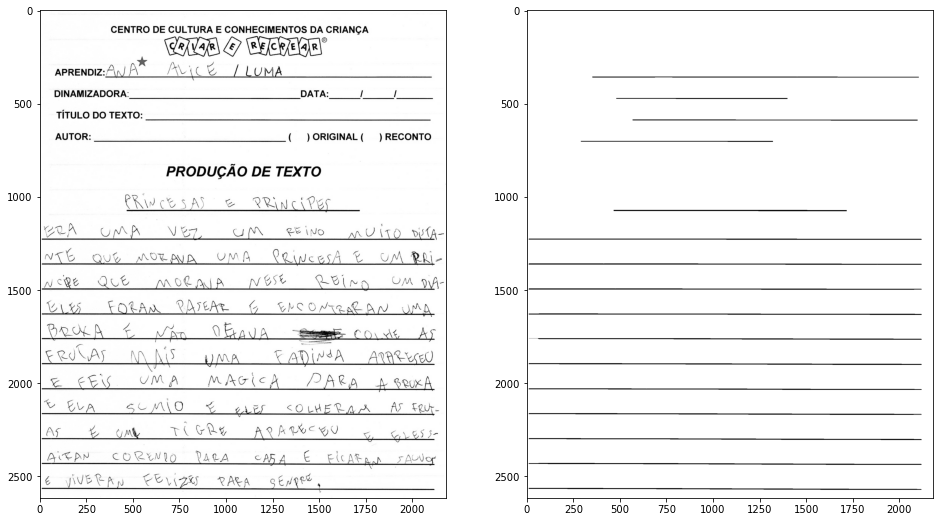

In [6]:
img = cv2.imread('./redacao.png', cv2.IMREAD_COLOR)
result = extract_horizontal_lines(img)

plt.figure(figsize=(16, 16))
plt.tight_layout()
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(cv2.bitwise_not(result), cmap='gray')
plt.show()

## Three curve types (lake, bay and line segment) useful for differentiating thinned objects in an image are shown in the following figure. Develop a morphological/logical for differentiating between these shapes. The input to your algorithm would be one of these three curves. The output must be the type of the input. You may assume the curves are 1 pixel thick and are fully connected. They can appear in any orientation.

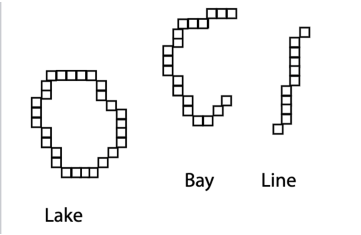

# Creating Lake, bay, line

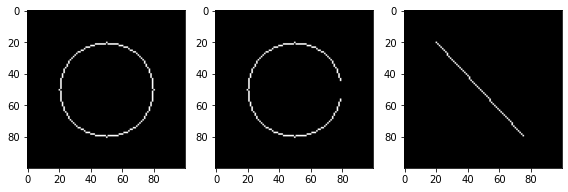

In [38]:
lake = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(lake, (50, 50), 30, 255, 1)

bay = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(bay, (50, 50), 30, 255, 1)
cv2.line(bay, (50, 50), (80, 50), 0, 10)

line = np.zeros((100, 100), dtype=np.uint8)
cv2.line(line, (20, 20), (75, 79), 255, 1)

plt.figure(figsize=(8, 8))
plt.subplot(131), plt.imshow(lake, cmap='gray')
plt.subplot(132), plt.imshow(bay, cmap='gray')
plt.subplot(133), plt.imshow(line, cmap='gray')
plt.tight_layout()
plt.show()

# Differentiate Types

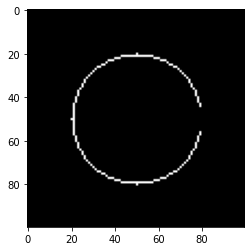

Is a bay
3.0


In [45]:
img = bay
_, binarized_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
kernel = np.ones((5, 5), np.uint8)
morph_image = cv2.morphologyEx(binarized_image, cv2.MORPH_CLOSE, kernel)
contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(contours)
for contour in contours:
    area = cv2.contourArea(contour)
    if area == 0.0:
        print("Is a Line")
    elif area < 10.0:
        print("Is a bay")
    else:
        print("Is a lake")
    print(area)